In [1]:
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

np.set_printoptions(precision=4)

# Consuming NumPy arrays

In [2]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [3]:
images, labels = train
images = images / 255
dataset = tf.data.Dataset.from_tensor_slices((images, labels))
dataset

<TensorSliceDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>

# Consuming Python generators

In [5]:
def count(stop):
    i = 0
    while i < stop:
        yield i 
        i += 1
        
for n in count(5):
    print(n)

0
1
2
3
4


In [6]:
ds_counter = tf.data.Dataset.from_generator(count, args=[25], output_types=tf.int32,
                                           output_shapes=())

In [7]:
ds_counter

<DatasetV1Adapter shapes: (), types: tf.int32>

In [22]:
for elem in ds_counter:
    print(elem)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(15, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(17, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(19, shape=(), dtype=int32)
tf.Tensor(20, shape=(), dtype=int32)
tf.Tensor(21, shape=(), dtype=int32)
tf.Tensor(22, shape=(), dtype=int32)
tf.Tensor(23, shape=(), dtype=int32)
tf.Tensor(24, shape=(), dtype=int32)


In [9]:
for count_batch in ds_counter.repeat().batch(10).take(10):
    print(count_batch)

tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)
tf.Tensor([10 11 12 13 14 15 16 17 18 19], shape=(10,), dtype=int32)
tf.Tensor([20 21 22 23 24  0  1  2  3  4], shape=(10,), dtype=int32)
tf.Tensor([ 5  6  7  8  9 10 11 12 13 14], shape=(10,), dtype=int32)
tf.Tensor([15 16 17 18 19 20 21 22 23 24], shape=(10,), dtype=int32)
tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)
tf.Tensor([10 11 12 13 14 15 16 17 18 19], shape=(10,), dtype=int32)
tf.Tensor([20 21 22 23 24  0  1  2  3  4], shape=(10,), dtype=int32)
tf.Tensor([ 5  6  7  8  9 10 11 12 13 14], shape=(10,), dtype=int32)
tf.Tensor([15 16 17 18 19 20 21 22 23 24], shape=(10,), dtype=int32)


In [10]:
def gen_series():
    i = 0
    while True:
        size = np.random.randint(0, 10)
        yield i, np.random.normal(size=(size, ))
        i += 1
        
for i, series in gen_series():
    print(i, ':', str(series))
    if i > 5:
        break

0 : [-0.56    1.2436  0.7768 -2.1896  0.0036 -0.3936 -2.6946]
1 : [-1.1122  0.1062 -0.5636 -1.0245  1.1748 -1.7622]
2 : [-0.4525  1.0608  0.554  -1.1803 -0.1201]
3 : [ 0.3459  1.5821 -0.32    0.7202  0.9405  0.3511]
4 : [-0.5042  0.2978 -1.2583]
5 : [1.1729 0.271 ]
6 : [ 1.9046 -1.1391 -1.3059  0.9148 -0.8085  0.5448]


In [11]:
ds_series = tf.data.Dataset.from_generator(gen_series, output_types=(tf.int32, tf.float32),
                                          output_shapes=((), (None, )))
ds_series

<DatasetV1Adapter shapes: ((), (None,)), types: (tf.int32, tf.float32)>

In [24]:
ds_series_batch = ds_series.shuffle(20).padded_batch(10,padded_shapes=((), (None, ))) # 必须指定padded_shapes
ids, sequence_batch = next(iter(ds_series_batch))
print(ids)
print()
print(sequence_batch)

tf.Tensor([10  5  3 14 23  9  6 19 13 18], shape=(10,), dtype=int32)

tf.Tensor(
[[-1.2637e+00 -4.6112e-01  5.3356e-01  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00]
 [ 1.0740e+00 -2.2690e+00  1.3360e+00  2.8628e-01  1.2178e-01  6.5742e-01
   1.5435e+00  0.0000e+00]
 [-2.1882e-01 -8.1412e-01  4.1117e-01  1.8360e+00  1.4760e+00 -2.4949e-01
  -4.5227e-01  2.2881e-01]
 [-1.1185e+00 -1.2708e-01  1.6763e+00 -3.5133e-01  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00]
 [ 1.3825e+00 -1.3103e+00 -1.8914e-01 -3.7303e-01 -1.1709e+00 -1.0490e+00
   0.0000e+00  0.0000e+00]
 [ 1.8520e+00  2.7720e+00 -3.6823e-01  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00]
 [ 6.3447e-01 -8.0602e-02 -1.2788e-01 -3.8301e-01  8.0167e-01  2.4919e-01
  -4.3623e-01  1.8926e+00]
 [ 6.6198e-01  8.4682e-01  2.0716e-04  1.1194e+00 -2.0580e+00  9.0461e-01
   0.0000e+00  0.0000e+00]
 [ 2.3872e

# Consuming TFRecord data

In [26]:
fsns_test_file = tf.keras.utils.get_file('fsns.tfrec',
                                        "https://storage.googleapis.com/download.tensorflow.org/data/fsns-20160927/testdata/fsns-00000-of-00001")

7905280/7904079 [==============================] - 34s 4us/step


In [27]:
fsns_test_file

'/home/kdd/.keras/datasets/fsns.tfrec'

In [28]:
dataset = tf.data.TFRecordDataset(filenames=[fsns_test_file])
dataset

<TFRecordDatasetV2 shapes: (), types: tf.string>

In [34]:
raw_example = next(iter(dataset))
parsed = tf.train.Example.FromString(raw_example.numpy())

In [35]:
parsed.features.feature['image/text']

bytes_list {
  value: "Rue Perreyon"
}

# Batching dataset elements

In [36]:
inc_dataset = tf.data.Dataset.range(100)
inc_dataset

<RangeDataset shapes: (), types: tf.int64>

In [37]:
for elem in inc_dataset.take(5):
    print(elem)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)


In [38]:
dec_dataset = tf.data.Dataset.range(0, -100, -1)

In [39]:
for elem in dec_dataset.take(5):
    print(elem)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(-1, shape=(), dtype=int64)
tf.Tensor(-2, shape=(), dtype=int64)
tf.Tensor(-3, shape=(), dtype=int64)
tf.Tensor(-4, shape=(), dtype=int64)


In [40]:
dataset= tf.data.Dataset.zip((inc_dataset, dec_dataset))
for elem in dataset.take(5):
    print(elem)

(<tf.Tensor: id=314, shape=(), dtype=int64, numpy=0>, <tf.Tensor: id=315, shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: id=316, shape=(), dtype=int64, numpy=1>, <tf.Tensor: id=317, shape=(), dtype=int64, numpy=-1>)
(<tf.Tensor: id=318, shape=(), dtype=int64, numpy=2>, <tf.Tensor: id=319, shape=(), dtype=int64, numpy=-2>)
(<tf.Tensor: id=320, shape=(), dtype=int64, numpy=3>, <tf.Tensor: id=321, shape=(), dtype=int64, numpy=-3>)
(<tf.Tensor: id=322, shape=(), dtype=int64, numpy=4>, <tf.Tensor: id=323, shape=(), dtype=int64, numpy=-4>)


In [42]:
batched_dataset = dataset.batch(4)
for batch in batched_dataset.take(5):
    print(batch)
    print()
    print([arr.numpy() for arr in batch])

(<tf.Tensor: id=354, shape=(4,), dtype=int64, numpy=array([0, 1, 2, 3])>, <tf.Tensor: id=355, shape=(4,), dtype=int64, numpy=array([ 0, -1, -2, -3])>)

[array([0, 1, 2, 3]), array([ 0, -1, -2, -3])]
(<tf.Tensor: id=356, shape=(4,), dtype=int64, numpy=array([4, 5, 6, 7])>, <tf.Tensor: id=357, shape=(4,), dtype=int64, numpy=array([-4, -5, -6, -7])>)

[array([4, 5, 6, 7]), array([-4, -5, -6, -7])]
(<tf.Tensor: id=358, shape=(4,), dtype=int64, numpy=array([ 8,  9, 10, 11])>, <tf.Tensor: id=359, shape=(4,), dtype=int64, numpy=array([ -8,  -9, -10, -11])>)

[array([ 8,  9, 10, 11]), array([ -8,  -9, -10, -11])]
(<tf.Tensor: id=360, shape=(4,), dtype=int64, numpy=array([12, 13, 14, 15])>, <tf.Tensor: id=361, shape=(4,), dtype=int64, numpy=array([-12, -13, -14, -15])>)

[array([12, 13, 14, 15]), array([-12, -13, -14, -15])]
(<tf.Tensor: id=362, shape=(4,), dtype=int64, numpy=array([16, 17, 18, 19])>, <tf.Tensor: id=363, shape=(4,), dtype=int64, numpy=array([-16, -17, -18, -19])>)

[array([16, 

In [43]:
batched_dataset

<BatchDataset shapes: ((None,), (None,)), types: (tf.int64, tf.int64)>

In [44]:
dataset.batch(7, drop_remainder=True) # 忽略最后一个批次

<BatchDataset shapes: ((7,), (7,)), types: (tf.int64, tf.int64)>

In [47]:
# batching tensors with padding
dataset = tf.data.Dataset.range(100)
dataset = dataset.map(lambda x: tf.fill([tf.cast(x, tf.int32)], x))
for elem in dataset.take(5):
    print(elem)

tf.Tensor([], shape=(0,), dtype=int64)
tf.Tensor([1], shape=(1,), dtype=int64)
tf.Tensor([2 2], shape=(2,), dtype=int64)
tf.Tensor([3 3 3], shape=(3,), dtype=int64)
tf.Tensor([4 4 4 4], shape=(4,), dtype=int64)


In [48]:
dataset = dataset.padded_batch(4, padded_shapes=(None, ))

In [51]:
for batch in dataset.take(3):
    print(batch)
    print()

tf.Tensor(
[[0 0 0]
 [1 0 0]
 [2 2 0]
 [3 3 3]], shape=(4, 3), dtype=int64)

tf.Tensor(
[[4 4 4 4 0 0 0]
 [5 5 5 5 5 0 0]
 [6 6 6 6 6 6 0]
 [7 7 7 7 7 7 7]], shape=(4, 7), dtype=int64)

tf.Tensor(
[[ 8  8  8  8  8  8  8  8  0  0  0]
 [ 9  9  9  9  9  9  9  9  9  0  0]
 [10 10 10 10 10 10 10 10 10 10  0]
 [11 11 11 11 11 11 11 11 11 11 11]], shape=(4, 11), dtype=int64)



In [2]:
titanic_file = tf.keras.utils.get_file('train.csv',
                                      "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

In [3]:
titanic_lines = tf.data.TextLineDataset(titanic_file)

In [54]:
for elem in titanic_lines.take(3):
    print(elem)

tf.Tensor(b'survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone', shape=(), dtype=string)
tf.Tensor(b'0,male,22.0,1,0,7.25,Third,unknown,Southampton,n', shape=(), dtype=string)
tf.Tensor(b'1,female,38.0,1,0,71.2833,First,C,Cherbourg,n', shape=(), dtype=string)


In [66]:
def plot_batch_sizes(ds):
    batch_sizes = [batch.shape[0] for batch in ds]
    plt.bar(range(len(batch_sizes)), batch_sizes)
    plt.xlabel('Batch number')
    plt.ylabel('Batch size')
    for x, y in zip(range(len(batch_sizes)), batch_sizes):
        plt.text(x, y+1, '%.0f'%y, ha='center')

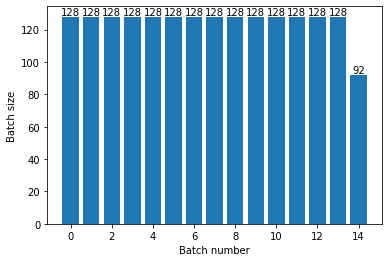

In [67]:
titanic_batches = titanic_lines.repeat(3).batch(128)
plot_batch_sizes(titanic_batches)

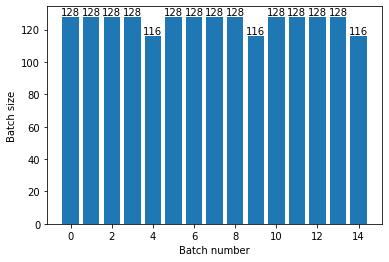

In [68]:
titanic_batches = titanic_lines.batch(128).repeat(3)
plot_batch_sizes(titanic_batches)

In [70]:
epochs = 3
dataset = titanic_lines.batch(128)
for epoch in range(epochs):
    for batch in dataset:
        print(batch.shape)
    print('End of epoch: ', epoch)

(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch:  0
(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch:  1
(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch:  2


In [4]:
# randomly shuffling input data
lines = tf.data.TextLineDataset(titanic_file)
counter = tf.data.experimental.Counter()

dataset = tf.data.Dataset.zip((counter, lines))
for c, l in dataset.take(3):
    print(c, l)
    print()

tf.Tensor(0, shape=(), dtype=int64) tf.Tensor(b'survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone', shape=(), dtype=string)

tf.Tensor(1, shape=(), dtype=int64) tf.Tensor(b'0,male,22.0,1,0,7.25,Third,unknown,Southampton,n', shape=(), dtype=string)

tf.Tensor(2, shape=(), dtype=int64) tf.Tensor(b'1,female,38.0,1,0,71.2833,First,C,Cherbourg,n', shape=(), dtype=string)



In [5]:
dataset = dataset.shuffle(buffer_size=100)
dataset = dataset.batch(20)
dataset

<BatchDataset shapes: ((None,), (None,)), types: (tf.int64, tf.string)>

In [6]:
n, line_batch = next(iter(dataset))
print(n)

tf.Tensor(
[ 84  76  54 101   2  31  72   9  56  81  50   3  51  77  94  79  74   0
  75  26], shape=(20,), dtype=int64)


In [7]:
dataset = tf.data.Dataset.zip((counter, lines))
shuffled = dataset.shuffle(buffer_size=100).batch(10).repeat(2)
print("Here are the item ID's near the epoch boundary:\n")
for n, line_batch in shuffled.skip(60).take(5):
    print(n.numpy())

Here are the item ID's near the epoch boundary:

[519 594 589 518 626 530 622 367 425 541]
[450 603 515 596 503 516 578 493 580 621]
[532 627 468 513 599 522 571 565]
[82 81  8 75 99 20 37  9 96  5]
[107  95  57  14 103  98  35  17  63  90]


In [8]:
for elem in shuffled.take(2):
    print(elem)

(<tf.Tensor: id=108, shape=(10,), dtype=int64, numpy=array([34, 24, 63, 38, 27, 77, 87, 28, 76, 36])>, <tf.Tensor: id=109, shape=(10,), dtype=string, numpy=
array([b'0,male,28.0,0,0,7.8958,Third,unknown,Cherbourg,y',
       b'0,male,40.0,0,0,27.7208,First,unknown,Cherbourg,y',
       b'1,female,30.0,0,0,12.475,Third,unknown,Southampton,y',
       b'0,male,28.0,2,0,21.6792,Third,unknown,Cherbourg,n',
       b'0,male,66.0,0,0,10.5,Second,unknown,Southampton,y',
       b'1,female,34.0,0,1,23.0,Second,unknown,Southampton,n',
       b'0,male,47.0,0,0,52.0,First,C,Southampton,y',
       b'0,male,28.0,1,0,82.1708,First,unknown,Cherbourg,n',
       b'1,male,23.0,0,1,63.3583,First,D,Cherbourg,n',
       b'0,male,28.0,0,0,8.05,Third,unknown,Southampton,y'], dtype=object)>)
(<tf.Tensor: id=110, shape=(10,), dtype=int64, numpy=array([95, 60, 73, 26, 68, 13, 79, 40, 92, 12])>, <tf.Tensor: id=111, shape=(10,), dtype=string, numpy=
array([b'0,male,28.0,0,0,8.05,Third,unknown,Southampton,y',
       b'

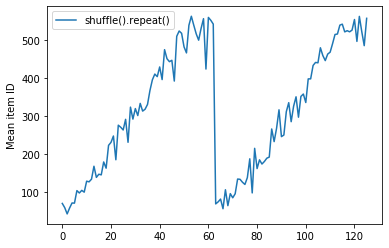

In [9]:
shuffle_repeat = [n.numpy().mean() for n, line_batch in shuffled]
plt.plot(shuffle_repeat, label='shuffle().repeat()')
plt.ylabel('Mean item ID')
plt.legend()

In [10]:
dataset = tf.data.Dataset.zip((counter, lines))
shuffled = dataset.repeat(2).shuffle(buffer_size=100).batch(10)
print("Here are the item ID's near the epoch boundary:\n")
for n, line_batch in shuffled.skip(55).take(15):
    print(n.numpy())

Here are the item ID's near the epoch boundary:

[499 620 603 606 485 609 588   3   8 591]
[ 20 615 572  11  18 621 614  27 366 444]
[552   9   4 358  36 449 535  40  42 562]
[568  44 507 504 602 578  43  46 600 534]
[505  33  35 530 583  12 546 490 479 593]
[489  55 574  22 570 613  71 383 498  56]
[ 17 525 597  52  57 622  72 557  75 619]
[ 70  69 482  87  41 611 595  58 450  30]
[ 39  86   2  67  29 559 556  51  13 107]
[ 21 448 392  26  15   7 462  54  60 564]
[617 118 122  16  92 470  99 115 284  89]
[624 461 108  50  83  32 114 134 125 126]
[117 138 140 607  97  62 301  81 149 106]
[144  37  84 148 541 111  34 145 136 130]
[129 150 142   0  95 105 162 116  63 168]


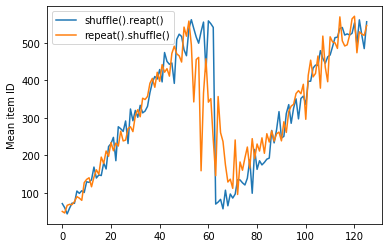

In [11]:
repeat_shuffle = [n.numpy().mean() for n, line_batch in shuffled]
plt.plot(shuffle_repeat, label='shuffle().reapt()')
plt.plot(repeat_shuffle, label='repeat().shuffle()')
plt.ylabel('Mean item ID')
plt.legend()